In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random



In [18]:
def assign(point, centroids, k):
  return min(range(k), key=lambda i: np.dot(centroids[i]-point, centroids[i]-point))

def compute_centroids(assignments, points, k):
  vec_sum = [np.zeros(len(points[0])) for _ in range(k)]
  counts = [0] * k
  
  for i, p in zip(assignments, points):
    vec_sum[i] += p
    counts[i] += 1
  return [vec_sum[i]/counts[i] if counts[i] > 0 else random.choice(points) for i in range(k)]

def kmeans(k, points):
  prev_assignments = [] # 이전의 어사인먼츠
  # 1. 랜덤하게 centroid를 설정
  
  centroids = points[np.random.choice(points.shape[0], replace=False, size=k)]
  # point중에 k개를 뽑아서 centroids로 설정
  
  for epoch in range(10):
    # 2. 각각의 점을 가장 가까운 중심점의 클러스터에 포함시킴    
    assignments = [assign(p, centroids, k) for p in points]

    # 3. 각 클러스터 별로 centroid를 다시 계산    
    centroids = compute_centroids(assignments, points, k)

    # 4.변화가 없으면 중지, 있으면 계속    
    if prev_assignments == assignments:
      break
    prev_assignments = assignments
    
  return assignments, centroids

In [19]:
k = 3
points = [np.random.randn(k) for _ in range(80)]
points.extend([np.random.randn(k) + np.array([5, 5, 5]) for _ in range(20)])
points.extend([np.random.randn(k) + np.array([10, 5, 0]) for _ in range(20)])
points = np.array(points)

# kmeans 실행
assignments, centroids = kmeans(k, points)

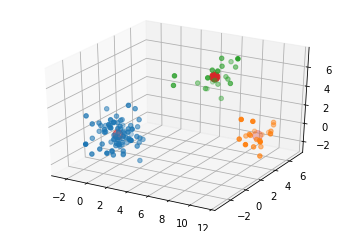

In [20]:
# 결과 확인
fig = plt.figure()
ax = fig.gca(projection='3d')

clusters = [[] for _ in range(k)]

for a, p in zip(assignments, points):
  clusters[a].append(p)

for cluster in clusters:
  ax.scatter(*zip(*cluster))
  
ax.scatter(*zip(*centroids), s=100)
plt.show()

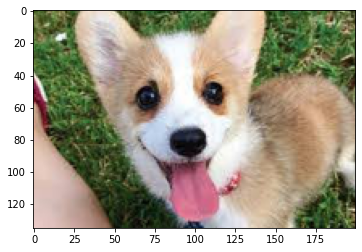

In [21]:
from PIL import Image
# 사진 불러오기 & 크기 조절 & 화면에 출력

im = Image.open("IMG_20171130_110254.jpg")
width = 200

height = im.height * width // im.width
im = im.resize((width, height))

plt.imshow(im)
plt.show()

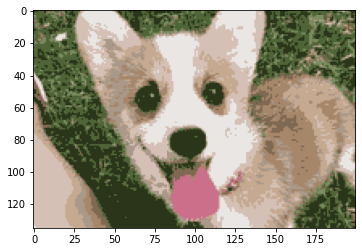

In [22]:
# 데이터 준비 & k-means 알고리즘 적용
pixels = np.array(im).reshape(-1,3)
assignments, centroids= kmeans(10, pixels)

# 모든 픽셀의 색을 centroid중 하나로 선택
for a, i in zip(assignments, range(pixels.shape[0])):
  pixels[i] = centroids[a]

# 바뀐 그림 출력
im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3), 'RGB')
plt.imshow(im_remastered)
plt.show()

In [ ]:
from PIL import Image
